In [1]:
from urllib.request import urlretrieve

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x79c6a503e840>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Analysis and Visulaization**

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Age**

In [11]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [12]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal= 'box',
                   nbins= 47,
                   title= "Distribution of Ages")
fig.update_layout(bargap = 0.15)
fig.show()

In [13]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [14]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                   title= "Distribution of BMI")
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color='smoker',
                   color_discrete_sequence= ['green', 'grey'],
                   title= "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color='sex',
                   color_discrete_sequence= ['skyblue', 'blue'],
                   title= "Annual Medical Charges on Gender")
fig.update_layout(bargap = 0.1)
fig.show()

# **Smoker**

In [17]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [18]:
px.histogram(medical_df, x ='smoker', color = 'sex', title= "Smoker")

In [19]:
px.histogram(medical_df, x ='children', color = 'sex', title= "Region")

# **Age and Charges**

In [20]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age VS Charges')
fig.update_traces(marker_size=5)
fig.show()

# **BMI & Charges**

In [21]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [22]:
fig = px.scatter(medical_df,
                 x='region',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Region VS Charges')
fig.update_traces(marker_size=5)
fig.show()

In [23]:
px.violin(medical_df,
                 x='children',
                 y='charges')

# **Correlation**

In [24]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [25]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [26]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [27]:
smoker_values={ 'no' :0, 'yes' :1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [28]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [29]:
medical_df.select_dtypes(include=['number']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlational Matrix')

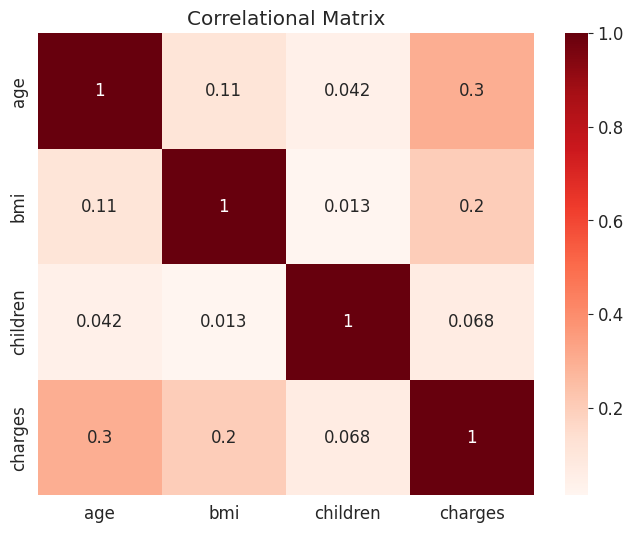

In [30]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title("Correlational Matrix")

# **Linear Regression using a Single Feature**

In [31]:
non_smoker_df=medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

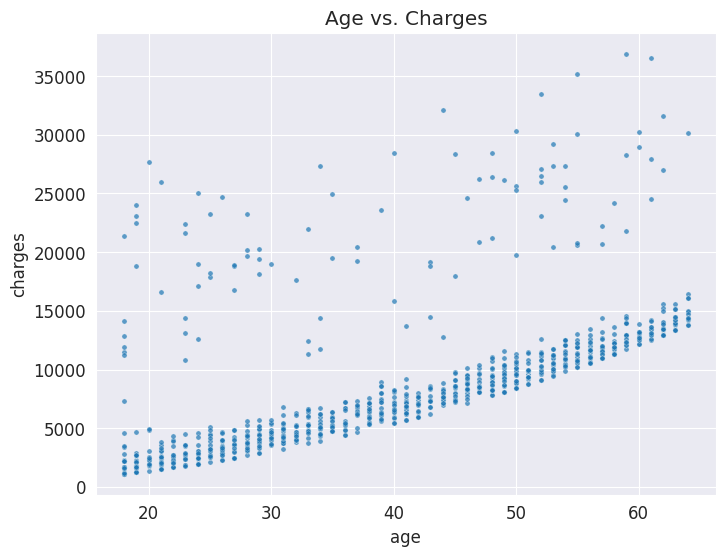

In [32]:
plt.title("Age vs. Charges")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=14)

# Expression or Formula for Linear Regression is
 *y=wx+b*

 where y is Y-axis of the Graph

 x represents X-axis of the Graph

 w is the slope (we can also called the weight)

 b is the interscept (we can also say bias)

In [33]:
def estimate_charges(age, w, b):
  return w * age + b

  ## estimate_charges is the first model we are defing.

In [34]:
w =50
b =100

In [35]:
estimate_charges(50, w, b)

2600

In [36]:
ages =non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [37]:
def estimate_charges(age, w, b):
  return w * age + b

estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [38]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'Estimated Charges')

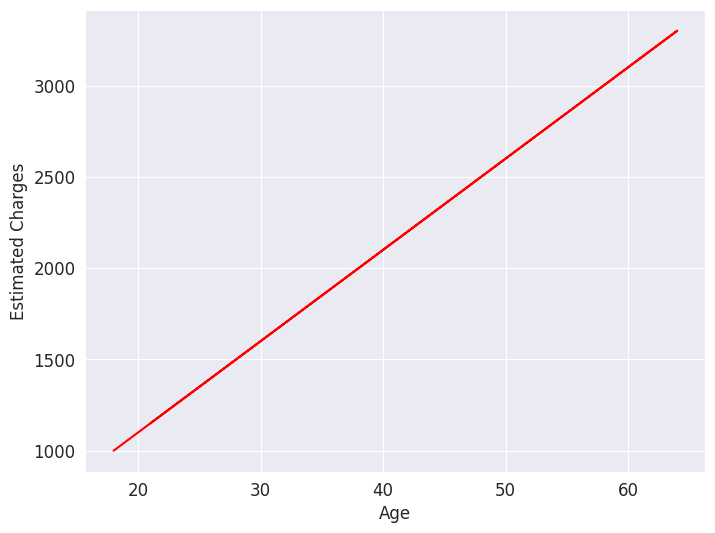

In [39]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

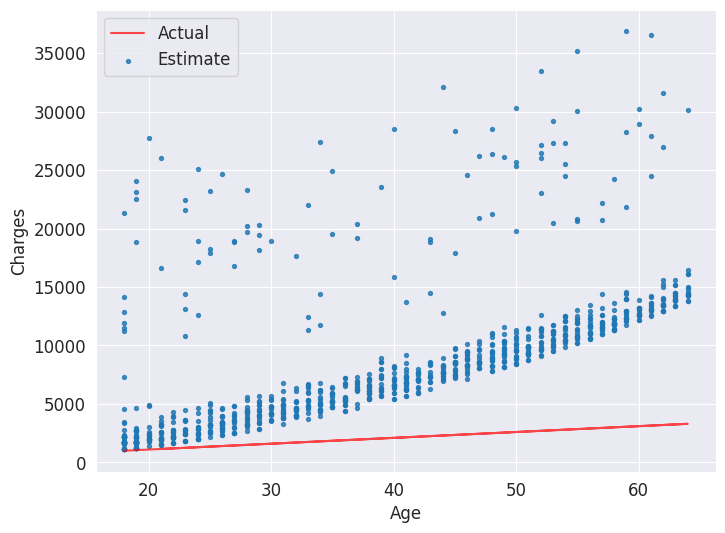

In [40]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.7)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend({'Estimate', 'Actual'})

In [41]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.7)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend({'Estimate', 'Actual'})

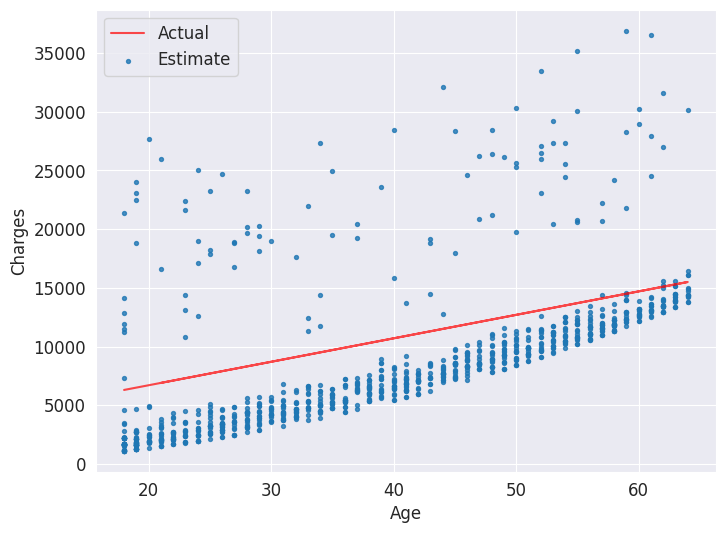

In [42]:
try_parameters(200, 2700)

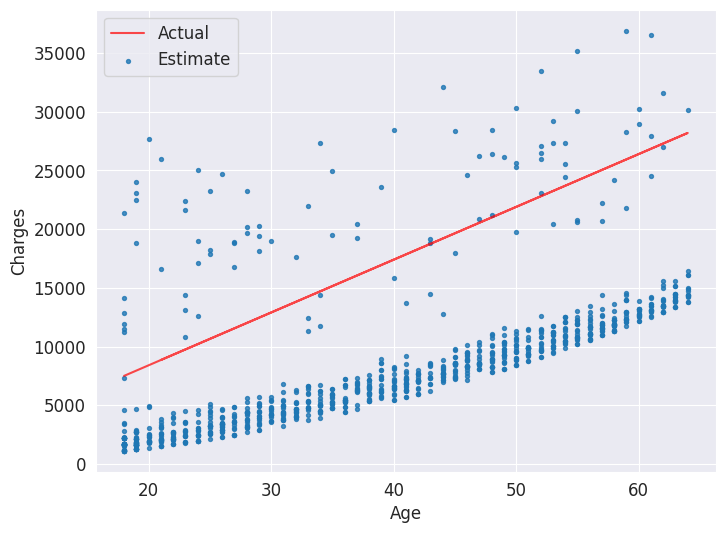

In [43]:
try_parameters(450, -600)

# **Loss/Cost Function**

*Calculate the difference between targets and predictions (difference is residual)*

*Square all elements of the difference to remove negative values*

*Calculate the average of the elements in the resulting matrix*

*Take the square root of the result*

*The result is the single number,known as **root mean squared error (RMSE)***

In [44]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [45]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [46]:
import numpy as np

In [47]:
def rmse(targets, prediction):
  return np.sqrt(np.mean(np.square(targets - prediction)))

In [48]:
w = 50
b = 100

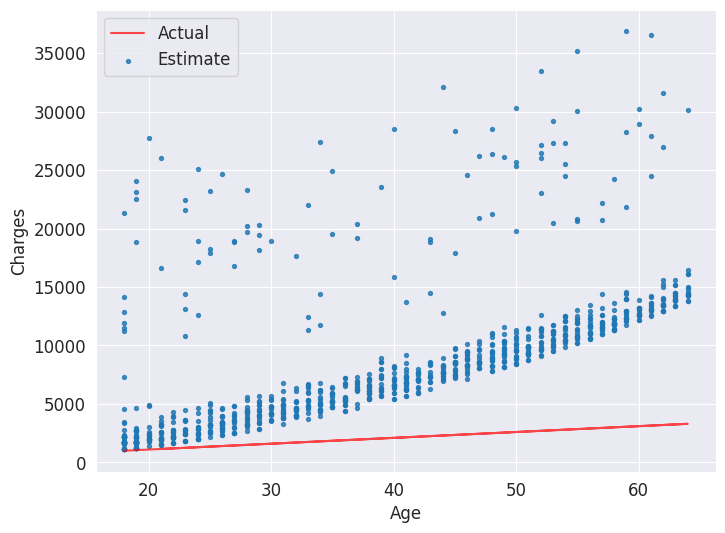

In [49]:
try_parameters(w, b)

In [50]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [51]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [52]:
def try_parameter(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);

  loss = rmse(target, predictions)
  print("RMSE Loss: ", loss)

RMSE Loss:  8044.90886266932


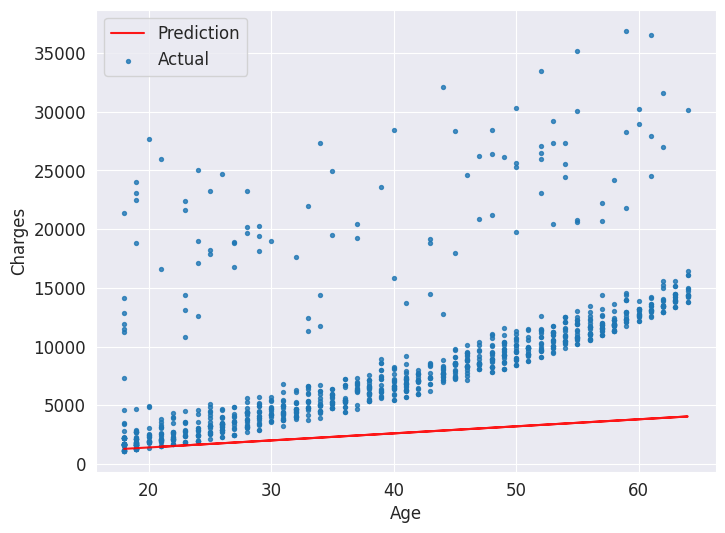

In [53]:
try_parameter(60,200)

RMSE Loss:  8312.556156041677


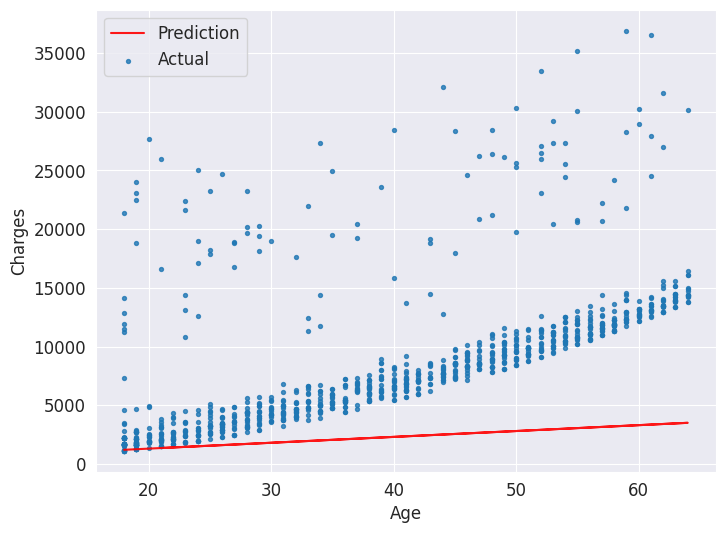

In [54]:
try_parameter(50,300)

RMSE Loss:  4680.269902358397


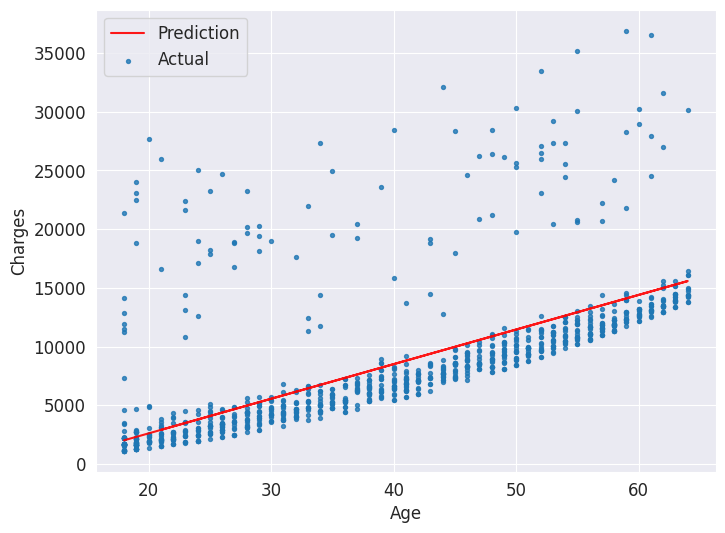

In [55]:
try_parameter(295, -3300)

# **Optimizer**

*We need Strategy to modify weigths w and b to reduce the loss and improve the 'fit' of the line to the data*

**Ordinary Least Squares:** *Better for smaller datasets*

**Stochastic Gradient Descent:** *Better for the larger datasets*

# **Linear Regression using Scikit-Learn**

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [59]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [60]:
model.fit(inputs, targets)

LinearRegression()

In [61]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [62]:
predictions = model.predict(inputs)

In [63]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [64]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [65]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [66]:
model.coef_

array([267.24891283])

In [67]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


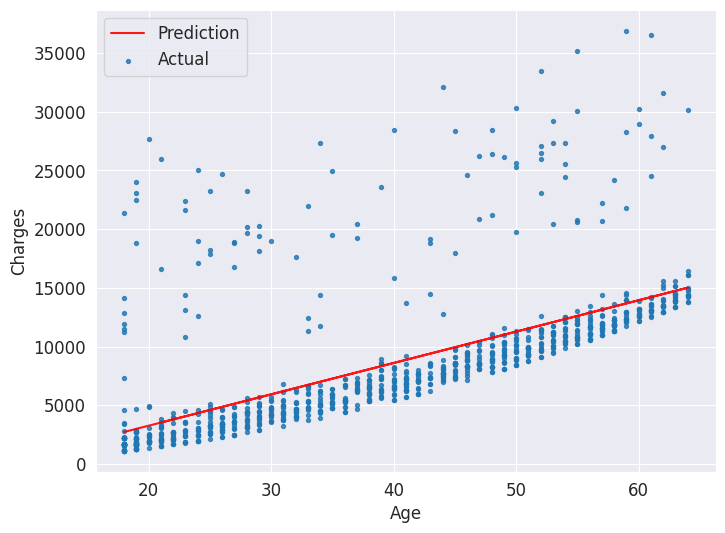

In [68]:
try_parameter(model.coef_, model.intercept_)

In [69]:
inputs = medical_df['smoker'].map(smoker_values).to_frame()
targets = medical_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1338, 1)
targets.shape:  (1338,)


In [70]:
model = LinearRegression()

In [71]:
model.fit(inputs.astype(float), targets)

LinearRegression()

In [72]:
inputs

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [73]:
model.predict(np.array([[0],[1]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 8434.26829786, 32050.23183153])

In [74]:
predictions = model.predict(inputs)

In [75]:
predictions

array([32050.23183153,  8434.26829786,  8434.26829786, ...,
        8434.26829786,  8434.26829786, 32050.23183153])

In [76]:
rmse(targets, predictions)

np.float64(7464.630999197847)

In [77]:
model.coef_

array([23615.96353368])

In [78]:
model.intercept_

np.float64(8434.2682978562)

RMSE Loss:  986497.4564474361


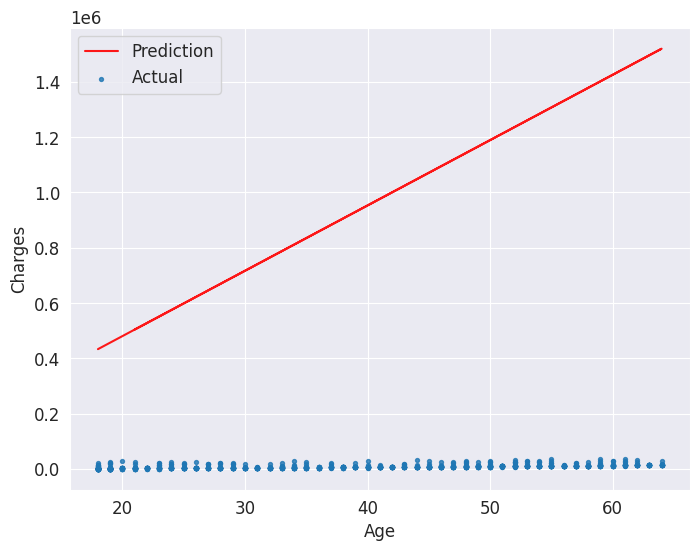

In [79]:
try_parameter(model.coef_, model.intercept_)

In [80]:
# Create inputs and targets
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636395


# **Linear Regression for Multiple Features**

*To simply the multiple features we can use charges = w1 * x + w2 * y + b*

In [81]:
# Create inputs and targets
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


In [82]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [83]:
fig = px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [84]:
fig = px.scatter_3d(non_smoker_df, x = 'bmi', y = 'age', z = 'charges',  title = 'Age vs. BMI vs. Charges')
fig.update_traces(marker_size=5,marker_opacity=0.8)
fig.show()

In [85]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [86]:
# Create inputs and targets
inputs = non_smoker_df[['age', 'bmi', 'children']]
targets = non_smoker_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038247


In [87]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']],medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


In [88]:
px.scatter(medical_df, x= 'age', y='charges', color = 'smoker')

# **Using Categorial Features For Machine Learning**

*To use the categorical coloumns, we simply need to convert them to numbers.*

<Axes: xlabel='smoker', ylabel='charges'>

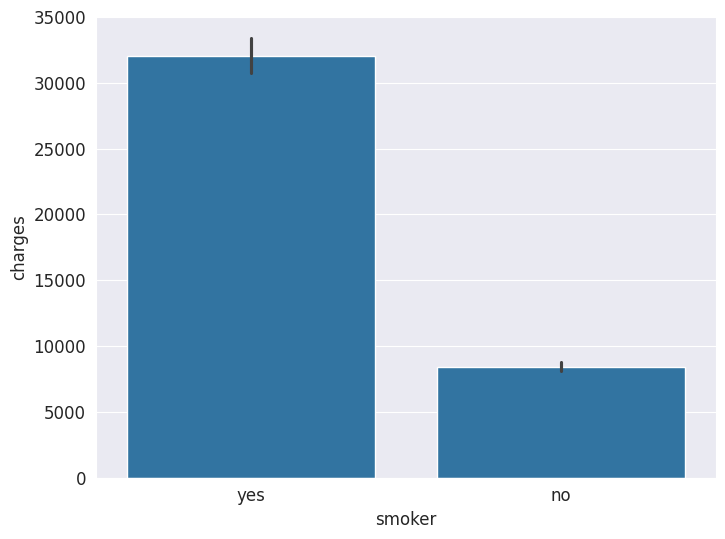

In [89]:
## BINARY CATEGORIES
sns.barplot(data=medical_df, x='smoker', y='charges')

In [90]:
smoker_codes={'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [91]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [92]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [93]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']],medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

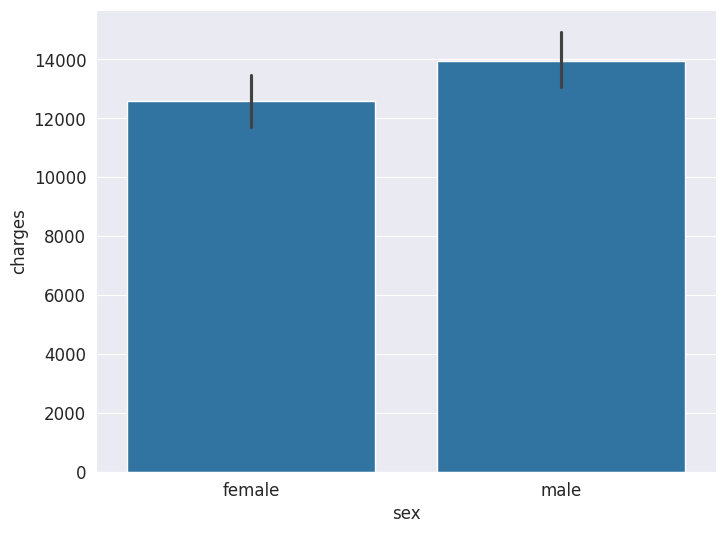

In [94]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [95]:
sex_codes={'female': 0, 'male': 1}

In [96]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [97]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [98]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [99]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']],medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


# **One-hot Encoding**

<Axes: xlabel='region', ylabel='charges'>

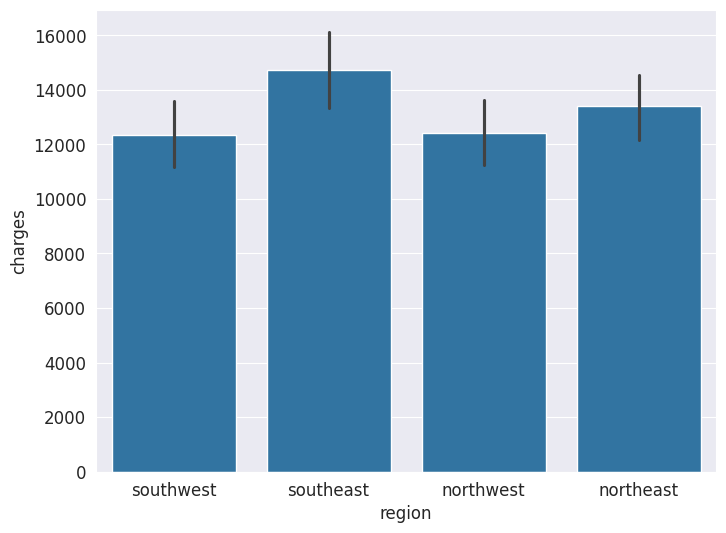

In [100]:
sns.barplot(data=medical_df, x='region', y='charges')

In [101]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [102]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [103]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [104]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [105]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [106]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [107]:
input_col = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_col], medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the Prediction
predictions = model.predict(inputs)

#Compute the loss to evavulate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)


Loss:  6041.6796511744515


In [108]:
medical_df[input_col].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [110]:
model.predict([[30, 28, 2, 1, 1, 0, 0, 1, 0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([28897.76792448])

# **Model Improvements**

# **Feature Scaling**
*Recall due to regulatory requirements, we also need to explain the rationale behind the predictions of model*

In [111]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [112]:
model.intercept_

np.float64(-12525.547811195444)

In [113]:
weights_df=pd.DataFrame({'feature': np.append(input_col, 1),
                          'weight': np.append(model.coef_, model.intercept_)
                          })
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [114]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [115]:
from sklearn.preprocessing import StandardScaler

In [117]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [118]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [119]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [120]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [121]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [130]:
cat_cols=['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorial_data = medical_df[cat_cols]

In [131]:
categorial_data

,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,1,0,0.0,0.0,0.0,1.0
1,0,1,0.0,0.0,1.0,0.0
2,0,1,0.0,0.0,1.0,0.0
3,0,1,0.0,1.0,0.0,0.0
4,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,0,1,0.0,1.0,0.0,0.0
1334,0,0,1.0,0.0,0.0,0.0
1335,0,0,0.0,0.0,1.0,0.0
1336,0,0,0.0,0.0,0.0,1.0


In [133]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [134]:
import numpy as np

# Combine scaled numeric inputs with categorical inputs
scaled_and_cat_inputs = np.hstack((scaled_inputs, categorial_data))

# Create a new model instance
scaled_model = LinearRegression()

# Train the new model with the scaled and combined inputs
scaled_model.fit(scaled_and_cat_inputs, targets)

print("Coefficients for scaled features:")
print(scaled_model.coef_)
print("\nIntercept for scaled features:")
print(scaled_model.intercept_)

Coefficients for scaled features:
[ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]

Intercept for scaled features:
8466.48321541183


### **Interpreting Coefficients from Scaled Features**

When features are scaled, the magnitude of the coefficients can be compared directly to understand their relative impact on the target variable. A larger absolute coefficient value indicates a stronger influence, *assuming all other features are held constant and the features were scaled using the same method*.

Let's update the `weights_df` to reflect these new coefficients.

In [135]:
new_input_col = numeric_cols + cat_cols

scaled_weights_df = pd.DataFrame({
    'feature': np.append(new_input_col, 'intercept'),
    'weight': np.append(scaled_model.coef_, scaled_model.intercept_)
})

display(scaled_weights_df.sort_values('weight', ascending=False))

,feature,weight
3,smoker_code,23848.534542
9,intercept,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Now, let's re-evaluate the model's performance with the scaled features.

In [136]:
# Generate predictions with the scaled model
scaled_predictions = scaled_model.predict(scaled_and_cat_inputs)

# Compute the loss to evaluate the scaled model
scaled_loss = rmse(targets, scaled_predictions)
print('Loss with scaled features: ', scaled_loss)

Loss with scaled features:  6041.6796511744515


In [137]:
weights_df=pd.DataFrame({'feature': np.append(numeric_cols + cat_cols, 1),
                          'weight': np.append(model.coef_, model.intercept_)
                          })
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,1,-12525.547811


In [138]:
new_customers = [[30, 28, 2, 1, 1, 0, 0, 1, 0]]

In [141]:
scaler.transform([[28, 30, 2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [145]:
scaled_model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 1, 0, 0, 1, 0.]])

array([29062.44212435])

## **How to approach a ML Problem**

1.Explore the data and find correlations between targets and inputs

2.Pick the right model, loss functions and optimizers for the probelm at hand.

3.Scale numeric variables and one-hot encode catergorial data

4.Set aside a test set(using a fraction of the training set)

5.Train the model

6.Make the predictions on the test set and compute the loss

## **Creating a Test Set**

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [148]:
model = LinearRegression().fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
test_loss = rmse(targets_test, predictions_test)
print('Test Loss: ', test_loss)


Test Loss:  6126.068345069565


In [149]:
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train, predictions_train)
print('Train Loss: ', loss)

Train Loss:  6035.638672797666
